#  Versuchdaten, Datenframe erstellen und anschauen

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
  
df = pd.read_csv("Versuchsaufzeichungen Schwingungen.csv")

### Datenframe anschauen

In [9]:
df

,b,g,y
0,0.1,10,0.9
1,0.1,18,0.3
2,0.3,10,0.9
3,0.3,18,0.5
4,0.2,14,2.8


In [10]:
df.describe()

,b,g,y
count,5.0,5.0,5.000000
mean,0.2,14.0,1.080000
std,0.1,4.0,0.995992
min,0.1,10.0,0.300000
25%,0.1,10.0,0.500000
50%,0.2,14.0,0.900000
75%,0.3,18.0,0.900000
max,0.3,18.0,2.800000


## Plotten
### Data Plot

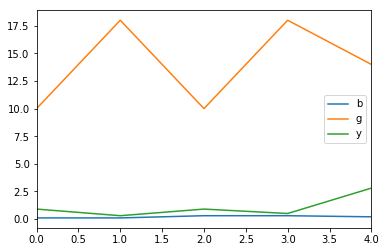

In [11]:
df.plot()

###  Boxplot

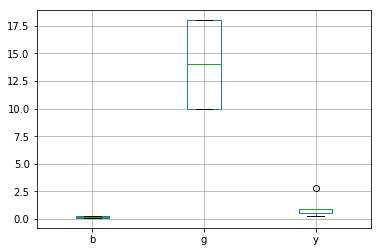

In [12]:
df.boxplot()


### 3D Scatter Plot

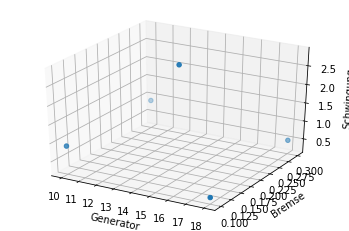

In [13]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df.g, df.b, df.y)
threedee.set_xlabel('Generator')
threedee.set_ylabel('Bremse')
threedee.set_zlabel('Schwingung')
plt.show()

# Ein einfaches Lineares Regressions Model

In [14]:
from sklearn import linear_model 
# Create linear regression object - between b and y 
regr = linear_model.LinearRegression() 

x= df.iloc[:,0:1]
y= df.iloc[:,2]

regr.fit(x,y)

# Train the model using the training sets regr.fit(x,y) 
y_pred = regr.predict(x) 
print('Koeffizienten: \n', regr.coef_)

print('\nIntercept:', regr.intercept_)


Koeffizienten: 
 [0.5]

Intercept: 0.9799999999999999


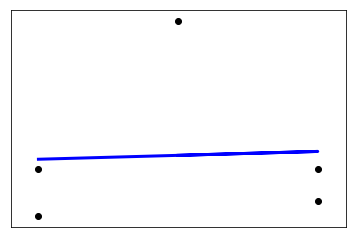

In [15]:

import matplotlib.pyplot as plt
plt.scatter(x,y, color='black') 
plt.plot(x,y_pred, color='blue', linewidth=3) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [16]:
from sklearn import linear_model 
# Create linear regression object - between g and y
regr = linear_model.LinearRegression() 

x= df.iloc[:,1:2]
y= df.iloc[:,2]

regr.fit(x,y)

# Train the model using the training sets regr.fit(x,y) 
y_pred = regr.predict(x) 
print('Koeffizienten: \n', regr.coef_)

print('\nIntercept:', regr.intercept_)

Koeffizienten: 
 [-0.0625]

Intercept: 1.955


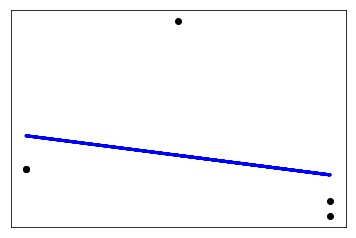

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x,y, color='black') 
plt.plot(x,y_pred, color='blue', linewidth=3) 
plt.xticks(()) 
plt.yticks(()) 
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

x= df.iloc[:,0:2]
y= df.iloc[:,2]

x= x.values
y=y.values

### Das linear model benötigt numPy arrays, daher formen wir unsere Daten um, X zu einem 2-dimensionalen 25x2, bzw. Y zu 25, eindimensional

In [19]:
x.shape

(5, 2)

In [20]:
y.shape

(5,)

### Model Fitten

In [21]:
model = LinearRegression().fit(x, y)

### Model Parameter und Anpassungsgüte betrachten

In [22]:
print('intercept:', model.intercept_)


intercept: 1.855


In [23]:
print('slope:', model.coef_)

slope: [ 0.5    -0.0625]


In [24]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.06552419354838701


### Model nutzen um Werte vorherzusagen

In [25]:
yPred= model.predict(x)

# Fortgeschritten: Statsmodel package, zahlreiche Statistiken

In [26]:
import statsmodels.api as sm

In [27]:
x = sm.add_constant(x)

In [28]:
model = sm.OLS(y, x)

In [29]:
results = model.fit()

In [30]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.869
Method:                 Least Squares   F-statistic:                   0.07012
Date:                Fri, 10 Jan 2020   Prob (F-statistic):              0.934
Time:                        21:45:46   Log-Likelihood:                -6.3473
No. Observations:                   5   AIC:                             18.69
Df Residuals:                       2   BIC:                             17.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8550      2.811      0.660      0.5

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
